# Neural Network


## Theory

### Feed Forward Neural Networks (FFNN)

A Feed Forward Neural Network is a type of artificial neural network where connections between the nodes do not form cycles. It consists of an input layer, one or more hidden layers, and an output layer. Each layer is composed of neurons that use activation functions to process inputs and pass the information forward.

**Components:**

- **Layers:** Input, Hidden, Output
- **Neurons:** Basic units that apply weights, biases, and activation functions
- **Activation Functions:** Sigmoid, ReLU, Leaky ReLU, etc.

#### Mathematical Foundations

To understand the mechanics of Feed Forward Neural Networks, we delve into the mathematical operations that occur during the forward and backward passes.

**Forward Pass:**

For each layer $l $, the input $\mathbf{a}^{(l-1)} $ is transformed using the weights $\mathbf{W}^{(l)} $ and biases $\mathbf{b}^{(l)} $:

$$
\mathbf{z}^{(l)} = \mathbf{W}^{(l)}\mathbf{a}^{(l-1)}  + \mathbf{b}^{(l)}
$$

$$
\mathbf{a}^{(l)} = \sigma(\mathbf{z}^{(l)})
$$

where:

- $\mathbf{W}^{(l)} $ is the weight matrix for layer $l $
- $\mathbf{b}^{(l)} $ is the bias vector for layer $l $
- $\sigma $ is the activation function applied element-wise

**Backpropagation:**

Backpropagation computes the gradient of the loss function with respect to each weight by applying the chain rule. The process involves two main steps:

1. **Compute the error at the output layer:**

$$
\delta^{(L)} = \nabla_a L \circ \sigma'(\mathbf{z}^{(L)})
$$

2. **Propagate the error backwards through the network:**

For each layer $l $ from $L-1 $ to $1 $:

$$
\delta^{(l)} = (\delta^{(l+1)} \mathbf{W}^{(l+1)^T}) \circ \sigma'(\mathbf{z}^{(l)})
$$

**Gradient Computation:**

The gradients of the loss with respect to weights and biases are then computed as:

$$
\frac{\partial L}{\partial \mathbf{W}^{(l)}} = \mathbf{a}^{(l-1)^T} \delta^{(l)}
$$

$$
\frac{\partial L}{\partial \mathbf{b}^{(l)}} = \sum_{i=1}^n \delta^{(l)}_i
$$

where $n $ is the number of samples in the batch.

**Weight Updates:**

Using the gradients, the weights and biases are updated as follows:

$$
\mathbf{W}^{(l)} := \mathbf{W}^{(l)} - \eta \frac{\partial L}{\partial \mathbf{W}^{(l)}}
$$

$$
\mathbf{b}^{(l)} := \mathbf{b}^{(l)} - \eta \frac{\partial L}{\partial \mathbf{b}^{(l)}}
$$

where $\eta $ is the learning rate.


### Backpropagation Algorithm

Backpropagation is the core algorithm for training neural networks. It involves two main steps:

1. **Forward Pass:** Compute the output of the network by passing the input through each layer.
2. **Backward Pass:** Calculate the gradient of the loss function with respect to each weight by applying the chain rule, and update the weights to minimize the loss.

**Steps in Backpropagation:**

1. Initialize weights and biases.
2. Perform a forward pass to compute the output.
3. Compute the loss using a cost function.
4. Perform a backward pass to calculate gradients.
5. Update weights and biases using an optimization algorithm (e.g., SGD, Adam).

### Activation Functions

Activation functions introduce non-linearity into the network, enabling it to learn complex patterns.

- **Sigmoid:** $ \sigma(x) = \frac{1}{1 + e^{-x}} $
- **ReLU (Rectified Linear Unit):** $ \text{ReLU}(x) = \max(0, x) $
- **Leaky ReLU:** $ \text{Leaky ReLU}(x) = \max(0.01x, x) $

### Weight Initialization

Proper initialization of weights is crucial for the training process. Common methods include:

- **Random Initialization:** Weights are initialized randomly, often using a normal distribution.
- **Xavier Initialization:** Designed to keep the scale of the gradients roughly the same in all layers.
- **He Initialization:** Similar to Xavier but scaled differently for ReLU activation functions.

### Cost Functions

The choice of cost function depends on the problem:

- **Regression:** Mean Squared Error (MSE)
- **Classification:** Cross-Entropy Loss


In [1]:
from ml_p2.utils import *
from ml_p2.neural_network.ffnn import NeuralNetwork
from ml_p2.utils.data_generation import generate_ff_data
from sklearn.model_selection import train_test_split
from ml_p2.visualization.plotting import plot_eval_metric_vs_iter

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

X, y = generate_ff_data(100, noise=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

Epoch 1/200, Loss: 0.0115, R2: 0.6309
Epoch 10/200, Loss: 0.0108, R2: 0.6533
Epoch 20/200, Loss: 0.0078, R2: 0.7507
Epoch 30/200, Loss: 0.0041, R2: 0.8695
Epoch 40/200, Loss: 0.0041, R2: 0.8683
Epoch 50/200, Loss: 0.0041, R2: 0.8690
Epoch 60/200, Loss: 0.0040, R2: 0.8732
Epoch 70/200, Loss: 0.0039, R2: 0.8748
Epoch 80/200, Loss: 0.0040, R2: 0.8718
Epoch 90/200, Loss: 0.0038, R2: 0.8776
Epoch 100/200, Loss: 0.0039, R2: 0.8752
Epoch 110/200, Loss: 0.0038, R2: 0.8767
Epoch 120/200, Loss: 0.0038, R2: 0.8791
Epoch 130/200, Loss: 0.0038, R2: 0.8788
Epoch 140/200, Loss: 0.0038, R2: 0.8787
Epoch 150/200, Loss: 0.0040, R2: 0.8712
Epoch 160/200, Loss: 0.0042, R2: 0.8639
Epoch 170/200, Loss: 0.0039, R2: 0.8735
Epoch 180/200, Loss: 0.0039, R2: 0.8745
Epoch 190/200, Loss: 0.0040, R2: 0.8723
Epoch 200/200, Loss: 0.0038, R2: 0.8771
Epoch 1/200, Loss: 0.0115, R2: 0.6294
Epoch 10/200, Loss: 0.0041, R2: 0.8679
Epoch 20/200, Loss: 0.0041, R2: 0.8695
Epoch 30/200, Loss: 0.0040, R2: 0.8722
Epoch 40/200, Lo

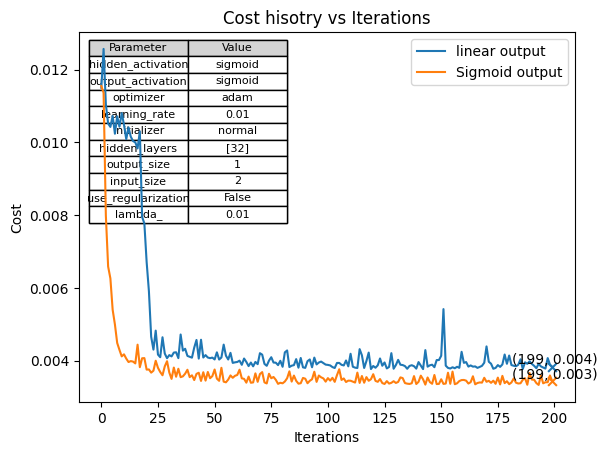

In [30]:
NN = NeuralNetwork(
    input_size=X_test_scaled.shape[1],
    hidden_layers=[32],
    output_size=1,
    learning_rate=0.01,
    hidden_activation="sigmoid",
    output_activation="linear",
    initializer="normal",
    optimizer="adam",
)


NN.train(
    X_train_scaled,
    y_train.reshape(-1, 1),
    epochs=200,
)
NN1 = NeuralNetwork(
    input_size=X_test_scaled.shape[1],
    hidden_layers=[32],
    output_size=1,
    learning_rate=0.01,
    hidden_activation="sigmoid",
    output_activation="sigmoid",
    initializer="normal",
    optimizer="adam",
)

NN1.train(
    X_train_scaled,
    y_train.reshape(-1, 1),
    epochs=200,
)

y_pred = NN.predict(X_test_scaled)
y_pred_train = NN.predict(X_train_scaled)

print("Test MSE: ", mean_squared_error(y_test, y_pred))
print("Train MSE: ", mean_squared_error(y_train, y_pred_train))
ch = NN.cost_history
params = NN.params
ch1 = NN1.cost_history
params1 = NN1.params
plot_eval_metric_vs_iter(ch, params, "linear output")
plot_eval_metric_vs_iter(ch1, params1, "Sigmoid output")

In [15]:
learning_rates = [0.005, 0.01, 0.1]
o_act = ["sigmoid", "linear"]
mses = []
for lr in learning_rates:
    for oa in o_act:
        NN = NeuralNetwork(
            input_size=X_test_scaled.shape[1],
            hidden_layers=[10],
            output_size=1,
            learning_rate=lr,
            optimizer="adam",
            output_activation=oa,
        )

        NN.train(X_train_scaled, y_train.reshape(-1, 1), epochs=100)

        y_pred = NN.predict(X_test_scaled)

        mses.append(mean_squared_error(y_test, y_pred))

Epoch 1/100, Loss: 0.0122, R2: 0.6088
Epoch 10/100, Loss: 0.0068, R2: 0.7831
Epoch 20/100, Loss: 0.0050, R2: 0.8406
Epoch 30/100, Loss: 0.0041, R2: 0.8681
Epoch 40/100, Loss: 0.0040, R2: 0.8724
Epoch 50/100, Loss: 0.0038, R2: 0.8767
Epoch 60/100, Loss: 0.0038, R2: 0.8773
Epoch 70/100, Loss: 0.0038, R2: 0.8768
Epoch 80/100, Loss: 0.0038, R2: 0.8779
Epoch 90/100, Loss: 0.0038, R2: 0.8785
Epoch 100/100, Loss: 0.0037, R2: 0.8808
Epoch 1/100, Loss: 0.0112, R2: 0.6406
Epoch 10/100, Loss: 0.0107, R2: 0.6551
Epoch 20/100, Loss: 0.0065, R2: 0.7915
Epoch 30/100, Loss: 0.0043, R2: 0.8628
Epoch 40/100, Loss: 0.0040, R2: 0.8726
Epoch 50/100, Loss: 0.0039, R2: 0.8741
Epoch 60/100, Loss: 0.0039, R2: 0.8755
Epoch 70/100, Loss: 0.0037, R2: 0.8820
Epoch 80/100, Loss: 0.0037, R2: 0.8826
Epoch 90/100, Loss: 0.0037, R2: 0.8802
Epoch 100/100, Loss: 0.0037, R2: 0.8827
Epoch 1/100, Loss: 0.0115, R2: 0.6309
Epoch 10/100, Loss: 0.0047, R2: 0.8477
Epoch 20/100, Loss: 0.0039, R2: 0.8750
Epoch 30/100, Loss: 0.0039

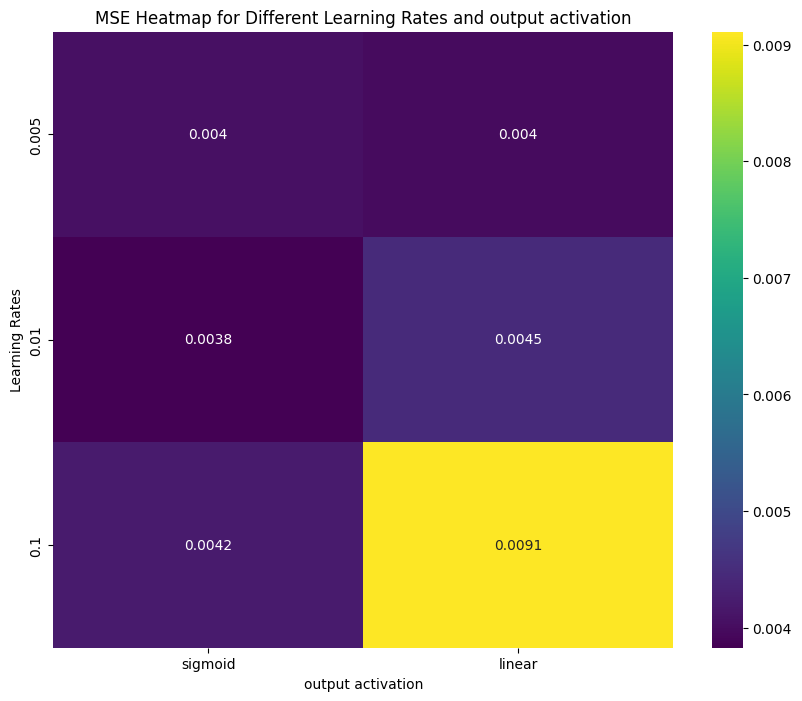

In [19]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Reshape the MSEs list into a 2D array
mse_matrix = np.array(mses).reshape(len(learning_rates), len(o_act))

plt.figure(figsize=(10, 8))
sns.heatmap(
    mse_matrix,
    annot=True,
    xticklabels=o_act,
    yticklabels=learning_rates,
    cmap="viridis",
)
plt.xlabel("output activation")
plt.ylabel("Learning Rates")
plt.title("MSE Heatmap for Different Learning Rates and output activation")
plt.show()

In [61]:
activations = ["relu", "leaky_relu", "sigmoid"]
mses1 = []
for lr in learning_rates:
    for a in activations:
        NN = NeuralNetwork(
            input_size=X_test_scaled.shape[1],
            hidden_layers=[32,16,8],
            output_size=1,
            learning_rate=lr,
            optimizer="adam",
            output_activation="sigmoid",
            hidden_activation=a,
        )

        NN.train(X_train_scaled, y_train.reshape(-1, 1), epochs=100)

        y_pred = NN.predict(X_test_scaled)

        mses1.append(mean_squared_error(y_test, y_pred))

Epoch 1/100, Loss: 0.0060, R2: 0.8068
Epoch 10/100, Loss: 0.0040, R2: 0.8726
Epoch 20/100, Loss: 0.0036, R2: 0.8853
Epoch 30/100, Loss: 0.0037, R2: 0.8827
Epoch 40/100, Loss: 0.0035, R2: 0.8892
Epoch 50/100, Loss: 0.0038, R2: 0.8767
Epoch 60/100, Loss: 0.0034, R2: 0.8897
Epoch 70/100, Loss: 0.0035, R2: 0.8890
Epoch 80/100, Loss: 0.0034, R2: 0.8907
Epoch 90/100, Loss: 0.0036, R2: 0.8855
Epoch 100/100, Loss: 0.0034, R2: 0.8909
Epoch 1/100, Loss: 0.0064, R2: 0.7946
Epoch 10/100, Loss: 0.0036, R2: 0.8831
Epoch 20/100, Loss: 0.0035, R2: 0.8867
Epoch 30/100, Loss: 0.0037, R2: 0.8827
Epoch 40/100, Loss: 0.0036, R2: 0.8856
Epoch 50/100, Loss: 0.0033, R2: 0.8926
Epoch 60/100, Loss: 0.0035, R2: 0.8886
Epoch 70/100, Loss: 0.0035, R2: 0.8884
Epoch 80/100, Loss: 0.0034, R2: 0.8919
Epoch 90/100, Loss: 0.0034, R2: 0.8906
Epoch 100/100, Loss: 0.0034, R2: 0.8916
Epoch 1/100, Loss: 0.0251, R2: 0.1954
Epoch 10/100, Loss: 0.0046, R2: 0.8528
Epoch 20/100, Loss: 0.0045, R2: 0.8547
Epoch 30/100, Loss: 0.0039

C:\Users\javid.rezai\CSMaster\fys-stk4155\ml\p2\ml-p2\ml_p2\neural_network\activations.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Epoch 40/100, Loss: 0.0039, R2: 0.8745
Epoch 50/100, Loss: 0.0061, R2: 0.8047
Epoch 60/100, Loss: 0.0044, R2: 0.8600
Epoch 70/100, Loss: 0.0041, R2: 0.8671
Epoch 80/100, Loss: 0.0044, R2: 0.8583
Epoch 90/100, Loss: 0.2719, R2: -7.7253
Epoch 100/100, Loss: 0.1846, R2: -4.9243
Epoch 1/100, Loss: 0.0312, R2: -0.0000
Epoch 10/100, Loss: 0.0097, R2: 0.6878
Epoch 20/100, Loss: 0.0046, R2: 0.8516
Epoch 30/100, Loss: 0.0037, R2: 0.8816
Epoch 40/100, Loss: 0.0038, R2: 0.8793
Epoch 50/100, Loss: 0.0039, R2: 0.8736
Epoch 60/100, Loss: 0.0037, R2: 0.8821
Epoch 70/100, Loss: 0.0036, R2: 0.8857
Epoch 80/100, Loss: 0.0043, R2: 0.8612
Epoch 90/100, Loss: 0.0037, R2: 0.8815
Epoch 100/100, Loss: 0.0038, R2: 0.8785


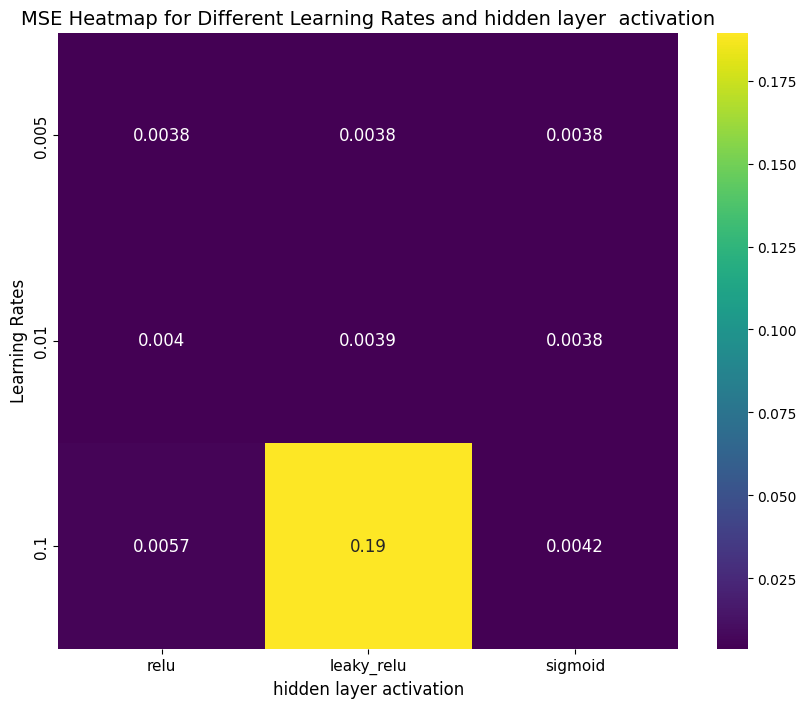

In [62]:
mse_matrix = np.array(mses1).reshape(len(learning_rates), len(activations))

plt.figure(figsize=(10, 8))
sns.heatmap(
    mse_matrix,
    annot=True,
    xticklabels=activations,
    yticklabels=learning_rates,
    cmap="viridis",
    annot_kws={'size': 12},
)
plt.xlabel("hidden layer activation", fontsize=12)
plt.ylabel("Learning Rates", fontsize=12)
plt.title("MSE Heatmap for Different Learning Rates and hidden layer  activation", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

In [57]:
regularization_strengths = [0.0001, 0.001, 0.01]
learning_rates = [0.005, 0.01, 0.1] 
mses2 = []
for rs in regularization_strengths:
    for lr in learning_rates:
        NN = NeuralNetwork(
            input_size=X_test_scaled.shape[1],
            hidden_layers=[32],
            output_size=1,
            learning_rate=lr,
            optimizer="adam",
            output_activation="sigmoid",
            hidden_activation='sigmoid',
            use_regularization=True,
            lambda_=rs,
        )

        NN.train(X_train_scaled, y_train.reshape(-1, 1), epochs=100)

        y_pred = NN.predict(X_test_scaled)

        mses2.append(mean_squared_error(y_test, y_pred))

Epoch 1/100, Loss: 0.0142, R2: 0.6090
Epoch 10/100, Loss: 0.0113, R2: 0.7907
Epoch 20/100, Loss: 0.0103, R2: 0.8613
Epoch 30/100, Loss: 0.0099, R2: 0.8744
Epoch 40/100, Loss: 0.0099, R2: 0.8718
Epoch 50/100, Loss: 0.0094, R2: 0.8802
Epoch 60/100, Loss: 0.0094, R2: 0.8811
Epoch 70/100, Loss: 0.0094, R2: 0.8832
Epoch 80/100, Loss: 0.0095, R2: 0.8852
Epoch 90/100, Loss: 0.0096, R2: 0.8849
Epoch 100/100, Loss: 0.0096, R2: 0.8871
Epoch 1/100, Loss: 0.0136, R2: 0.6266
Epoch 10/100, Loss: 0.0104, R2: 0.8428
Epoch 20/100, Loss: 0.0100, R2: 0.8782
Epoch 30/100, Loss: 0.0097, R2: 0.8829
Epoch 40/100, Loss: 0.0098, R2: 0.8806
Epoch 50/100, Loss: 0.0099, R2: 0.8828
Epoch 60/100, Loss: 0.0098, R2: 0.8870
Epoch 70/100, Loss: 0.0104, R2: 0.8685
Epoch 80/100, Loss: 0.0101, R2: 0.8790
Epoch 90/100, Loss: 0.0099, R2: 0.8859
Epoch 100/100, Loss: 0.0097, R2: 0.8880
Epoch 1/100, Loss: 0.0117, R2: 0.7916
Epoch 10/100, Loss: 0.0093, R2: 0.8665
Epoch 20/100, Loss: 0.0088, R2: 0.8711
Epoch 30/100, Loss: 0.0090

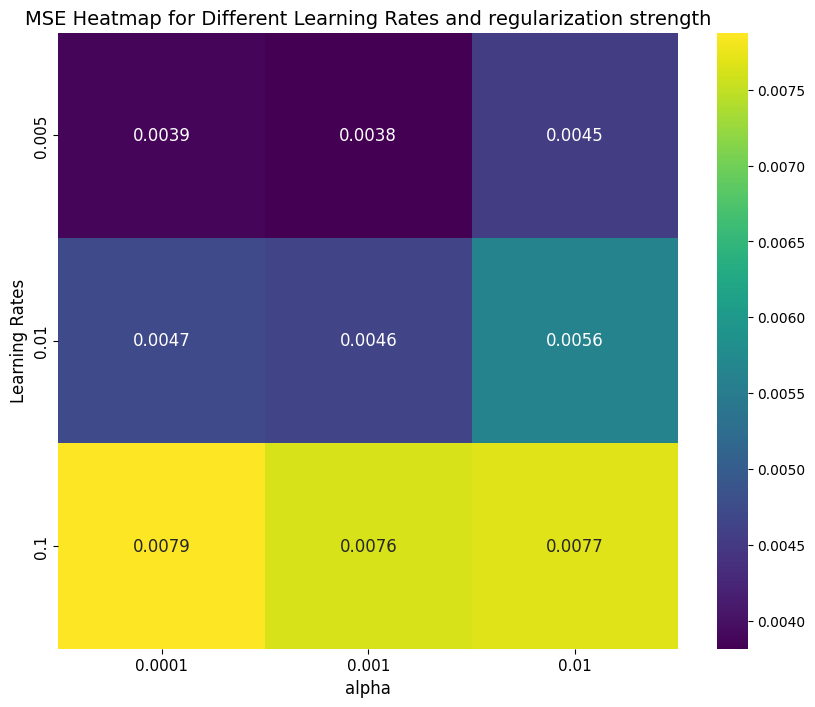

In [58]:
mse_matrix = np.array(mses2).reshape(len(regularization_strengths), len(learning_rates))

plt.figure(figsize=(10, 8))
sns.heatmap(
    mse_matrix,
    annot=True,
    xticklabels=regularization_strengths,
    yticklabels=learning_rates,
    cmap="viridis",
    annot_kws={'size': 12}, 
)
plt.xlabel("alpha", fontsize=12)
plt.ylabel("Learning Rates", fontsize=12)
plt.title("MSE Heatmap for Different Learning Rates and regularization strength", fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()